In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import LeaveOneOut, cross_val_score


class_pos = np.array([
    [2, 7], [3, 8], [5, 1], [6, 2], [7, 3], [8, 4], [9, 5]
])
class_neg = np.array([
    [1, 5], [2, 6], [3, 7], [4, 8], [5, 9], [7, 2], [8, 3]
])

X = np.vstack((class_pos, class_neg))
y = np.array([1] * len(class_pos) + [0] * len(class_neg))  



In [3]:

# (a) Calculate classification error for different k values
errors = {}
for k in range(1, 15):  # test k from 1 to 9
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X, y)
    predictions = knn.predict(X)
    print
    error_rate = np.mean(predictions != y)
    errors[k] = error_rate
errors

{1: 0.0,
 2: 0.35714285714285715,
 3: 0.42857142857142855,
 4: 0.21428571428571427,
 5: 0.2857142857142857,
 6: 0.2857142857142857,
 7: 0.2857142857142857,
 8: 0.2857142857142857,
 9: 0.2857142857142857,
 10: 0.5,
 11: 0.42857142857142855,
 12: 0.5714285714285714,
 13: 0.42857142857142855,
 14: 0.5}

In [4]:

loo = LeaveOneOut()
loo_errors = {}
for k in range(1, 14):
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X, y, cv=loo, scoring="accuracy")
    loo_errors[k] = 1 - np.mean(scores)  
loo_errors



{1: 0.7142857142857143,
 2: 0.7142857142857143,
 3: 0.4285714285714286,
 4: 0.6428571428571428,
 5: 0.2857142857142857,
 6: 0.3571428571428571,
 7: 0.2857142857142857,
 8: 0.6428571428571428,
 9: 1.0,
 10: 0.7142857142857143,
 11: 1.0,
 12: 0.7142857142857143,
 13: 1.0}

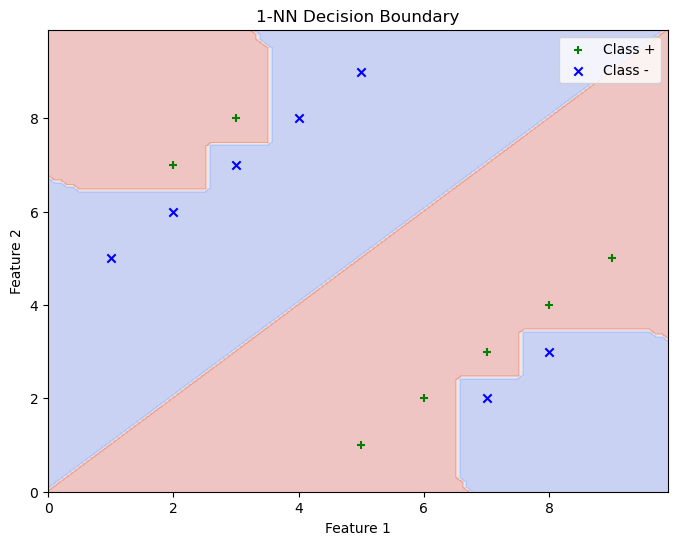

({1: 0.0,
  2: 0.35714285714285715,
  3: 0.42857142857142855,
  4: 0.21428571428571427,
  5: 0.2857142857142857,
  6: 0.2857142857142857,
  7: 0.2857142857142857,
  8: 0.2857142857142857,
  9: 0.2857142857142857,
  10: 0.5,
  11: 0.42857142857142855,
  12: 0.5714285714285714,
  13: 0.42857142857142855,
  14: 0.5},
 {1: 0.7142857142857143,
  2: 0.7142857142857143,
  3: 0.4285714285714286,
  4: 0.6428571428571428,
  5: 0.2857142857142857,
  6: 0.3571428571428571,
  7: 0.2857142857142857,
  8: 0.6428571428571428,
  9: 1.0,
  10: 0.7142857142857143,
  11: 1.0,
  12: 0.7142857142857143,
  13: 1.0})

In [5]:
# (d) Plot decision boundary for 1-NN
knn_1 = KNeighborsClassifier(n_neighbors=1)
knn_1.fit(X, y)

# Create a grid of points for decision boundary
x_min, x_max = 0, 10
y_min, y_max = 0, 10
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, 0.1))
Z = knn_1.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot results
plt.figure(figsize=(8, 6))
plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.coolwarm)
plt.scatter(class_pos[:, 0], class_pos[:, 1], c='green', marker='+', label="Class +")
plt.scatter(class_neg[:, 0], class_neg[:, 1], c='blue ', marker='x', label="Class -")
plt.title("1-NN Decision Boundary")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.show()

errors, loo_errors


In [21]:
arr = np.array([[1.5,-1.5],
                [-1.5,-2.5],
                [-0.5,2.5],
                [0.5,1.5]])


arr2 = np.array([[4,1],
                [1,0],
                [2,5],
                [3,4]])

In [23]:
v2 = np.array([[-6 + np.sqrt(37)],[1]])
v1 = np.array([[-6 - np.sqrt(37)],[1]])

print((arr2 @ v2) )
print((arr2 @ v1) )

[[1.33105012]
 [0.08276253]
 [5.16552506]
 [4.24828759]]
[[-47.33105012]
 [-12.08276253]
 [-19.16552506]
 [-32.24828759]]
